# Data Project - Anna, Signe og Klara

Imports and set magics:

In [12]:
import pandas as pd
#%pip install matplotlib-venn
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('Data/')
assert os.path.isfile('Data/BIO5.xlsx')

# Print everything in data
os.listdir('Data/')

['BIO5.xlsx', '~$BIO5.xlsx']

# Read and clean data

We import the data, downloaded from DST and start the data cleaning process.

In [14]:
filename = 'Data/BIO5.xlsx' # open the file and have a look at it
bio = pd.read_excel(filename, skiprows=2)
bio.head(5)

#filling out the NaN values in the columns
bio['Unnamed: 1'] = bio['Unnamed: 1'].fillna(method='ffill')
bio['Unnamed: 2'] = bio['Unnamed: 2'].fillna(method='ffill')
bio['Unnamed: 3'] = bio['Unnamed: 3'].fillna(method='ffill')

#Showing the first 10 rows of the data
bio.head(10)

C:\Users\annaf\AppData\Local\Temp\ipykernel_15160\1685633206.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bio['Unnamed: 1'] = bio['Unnamed: 1'].fillna(method='ffill')
C:\Users\annaf\AppData\Local\Temp\ipykernel_15160\1685633206.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bio['Unnamed: 2'] = bio['Unnamed: 2'].fillna(method='ffill')
C:\Users\annaf\AppData\Local\Temp\ipykernel_15160\1685633206.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bio['Unnamed: 3'] = bio['Unnamed: 3'].fillna(method='ffill')


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Årets premierefilm,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm og dokumentarfilm, alle målgrupper",2901.0,4107.0,2268.0,2810.0,2860.0,...,3184.0,3710.0,2522.0,2470.0,3481.0,2611.0,3476.0,2464.0,2943.0,2468.0
1,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, alle målgrupper",2883.0,4066.0,2180.0,2679.0,2788.0,...,3159.0,3690.0,2504.0,2433.0,3445.0,2591.0,3471.0,2436.0,2931.0,2449.0
2,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),Spillefilm. voksne,1010.0,1875.0,1455.0,1465.0,1883.0,...,2322.0,2443.0,2089.0,1657.0,2341.0,2250.0,2902.0,1314.0,2186.0,2210.0
3,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, børn/unge/familie",1873.0,2191.0,725.0,1214.0,905.0,...,836.0,1247.0,415.0,776.0,1105.0,342.0,570.0,1122.0,745.0,239.0
4,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, alle målgrupper",17.0,41.0,88.0,131.0,72.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0
5,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),Dokumentarfilm voksne,17.0,41.0,88.0,131.0,72.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0
6,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, børn/unge/familie",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),Uoplyst,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NaN,Danmark,Alle censurforhold,Film (antal),"Spillefilm og dokumentarfilm, alle målgrupper",38.0,35.0,32.0,33.0,33.0,...,31.0,35.0,36.0,36.0,37.0,27.0,22.0,18.0,33.0,34.0
9,NaN,Danmark,Alle censurforhold,Film (antal),"Spillefilm, alle målgrupper",28.0,30.0,27.0,23.0,24.0,...,25.0,27.0,27.0,30.0,26.0,23.0,20.0,14.0,30.0,30.0


We perform different kind of data cleaning, in order to have a more structed dataset which will be easier to work with.

In [15]:
# These columns have to go: 'Unnamed: 0'
drop_these = ['Unnamed: 0'] # use list comprehension to create list of columns
print(drop_these)

bio.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
bio.rename(columns = {'Unnamed: 1':'Country'}, inplace=True)
bio.rename(columns = {'Unnamed: 2':'Censorship'}, inplace=True)
bio.rename(columns = {'Unnamed: 3':'Type'}, inplace=True)
bio.rename(columns = {'Unnamed: 4':'Cinema_movies'}, inplace=True)
bio.head(10)

#Creating a dataset with year as a column
bio_melted = bio.melt(id_vars=['Country', 'Censorship', 'Type', 'Cinema_movies'], var_name='Year', value_name='Value')
bio_melted['Year'] = bio_melted['Year'].str.replace('bio', '').astype(int)
bio_melted = bio_melted[bio_melted['Year'] >= 2015]
bio_melted.head(10)


['Unnamed: 0']


,Country,Censorship,Type,Cinema_movies,Year,Value
2320,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm og dokumentarfilm, alle målgrupper",2015,3710.0
2321,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, alle målgrupper",2015,3690.0
2322,Danmark,Alle censurforhold,Solgte billetter (1.000),Spillefilm. voksne,2015,2443.0
2323,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, børn/unge/familie",2015,1247.0
2324,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, alle målgrupper",2015,20.0
2325,Danmark,Alle censurforhold,Solgte billetter (1.000),Dokumentarfilm voksne,2015,20.0
2326,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, børn/unge/familie",2015,0.0
2327,Danmark,Alle censurforhold,Solgte billetter (1.000),Uoplyst,2015,0.0
2328,Danmark,Alle censurforhold,Film (antal),"Spillefilm og dokumentarfilm, alle målgrupper",2015,35.0
2329,Danmark,Alle censurforhold,Film (antal),"Spillefilm, alle målgrupper",2015,27.0


## Exploring the data set

Firstly, we want to explore the dataset a bit further. We focus on movies in Denmark, the US and the EU, and look at the development in the number of movies and the number of sold tickets. 

In [16]:
selected_countries = ['Danmark', 'USA', 'EU-28 udenfor Danmark']
selected_censorship = 'Alle censurforhold'
selected_type = ['Film (antal)', "Solgte billetter (1.000)"]
selected_cinema_movies = 'Spillefilm og dokumentarfilm, alle målgrupper'

filtered_bio = bio_melted[(bio_melted['Country'].isin(selected_countries)) & 
                   (bio_melted['Censorship'] == selected_censorship) & 
                   (bio_melted['Type'].isin(selected_type)) &
                   (bio_melted['Cinema_movies'] == selected_cinema_movies)]

summary_stats = filtered_bio.groupby(['Country','Type'])['Value'].describe()
print(summary_stats)

                                                count         mean  \
Country               Type                                           
Danmark               Film (antal)                9.0    30.888889   
                      Solgte billetter (1.000)    9.0  2905.000000   
EU-28 udenfor Danmark Film (antal)                9.0    69.222222   
                      Solgte billetter (1.000)    9.0  1321.888889   
USA                   Film (antal)                9.0    86.888889   
                      Solgte billetter (1.000)    9.0  5391.222222   

                                                        std     min     25%  \
Country               Type                                                    
Danmark               Film (antal)                 6.900081    18.0    27.0   
                      Solgte billetter (1.000)   514.184549  2464.0  2470.0   
EU-28 udenfor Danmark Film (antal)                15.982629    38.0    66.0   
                      Solgte billetter (1.00

From the summary statistics above we see that USA has the highest average number of cinema movies and sold tickets. 
EU-28 udenfor Danmark has the second highest average number of cinema movies and sold tickets. Danmark has the 
lowest average number of cinema movies and sold tickets, which makes sense with regards to the size of the 
country/area included in the dataset.

Then we want to explore the dataset even further. We still focus on movies in Denmark, the US and the EU, but now explore the censorship types in the data set, with regards to  number of movies within the categories.

In [17]:
selected_countries_censorship = ['Danmark', 'USA', 'EU-28 udenfor Danmark']
selected_censorship_censorship = ['Tilladt for alle', 'Frarådet  for børn under 7 år', 'Tilladt for børn over 15 år']
selected_type_censorship = ['Film (antal)']
selected_cinema_movies_censorship = 'Spillefilm og dokumentarfilm, alle målgrupper'

filtered_bio_cencorship = bio_melted[(bio_melted['Country'].isin(selected_countries_censorship)) & 
                     (bio_melted['Censorship'].isin(selected_censorship_censorship)) &
                     (bio_melted['Type'].isin(selected_type_censorship)) &
                     (bio_melted['Cinema_movies'] == selected_cinema_movies_censorship)]


summary_stats = filtered_bio_cencorship.groupby(['Country', 'Censorship'])['Value'].describe()
print(summary_stats)

                                                     count       mean  \
Country               Censorship                                        
Danmark               Frarådet  for børn under 7 år    9.0   6.888889   
                      Tilladt for alle                 9.0  11.444444   
                      Tilladt for børn over 15 år      9.0   8.555556   
EU-28 udenfor Danmark Frarådet  for børn under 7 år    9.0  15.222222   
                      Tilladt for alle                 9.0  24.888889   
                      Tilladt for børn over 15 år      9.0  13.888889   
USA                   Frarådet  for børn under 7 år    9.0  17.000000   
                      Tilladt for alle                 9.0  24.888889   
                      Tilladt for børn over 15 år      9.0  24.666667   

                                                          std   min   25%  \
Country               Censorship                                            
Danmark               Frarådet  for børn u

From the summary statistics above we see that the mean in general is highest for the category "Tilladt for alle", but at the same time we see that the same category also has got the highest standard deviation, hence the biggest volatility within the observations. Again we see that US has the highest mean, minimum and maximum value, next is Denmark and EU-28 with the lowest mean, minimum and maximum. 

# Analysis

Next, we plot two figures: The number of movies and the number of sold tickets across selected countries/areas. 

**Figure 1**

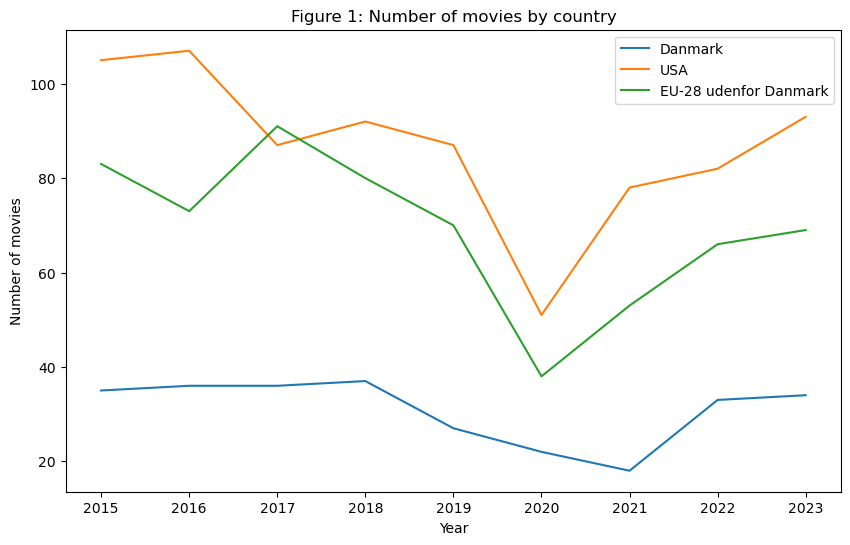

In [18]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define filtered DataFrame for Denmark
filtered_bio_dk_movies = filtered_bio[(filtered_bio['Country'] == 'Danmark') & (filtered_bio['Type'] == 'Film (antal)')]

# Define filtered DataFrame for USA
filtered_bio_usa_movies = filtered_bio[(filtered_bio['Country'] == 'USA') & (filtered_bio['Type'] == 'Film (antal)')]

# Define filtered DataFrame for EU-28 excluding Denmark
filtered_bio_eu_movies = filtered_bio[(filtered_bio['Country'] == 'EU-28 udenfor Danmark') & (filtered_bio['Country'] != 'Danmark') & (filtered_bio['Type'] == 'Film (antal)')]

# Plot for Danmark
ax.plot(filtered_bio_dk_movies['Year'], filtered_bio_dk_movies['Value'], label='Danmark')

# Plot for USA
ax.plot(filtered_bio_usa_movies['Year'], filtered_bio_usa_movies['Value'], label='USA')

# Plot for EU-28 udenfor Danmark
ax.plot(filtered_bio_eu_movies['Year'], filtered_bio_eu_movies['Value'], label='EU-28 udenfor Danmark')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of movies')
ax.set_title('Figure 1: Number of movies by country')

# Add legend
ax.legend()

# Show the plot
plt.show()

Figure 1 shows the development in number of presented movies in Denmark, the United States and the EU-28. We see that the number of movies presented in Denmark generally lies at a lower level, which is not surprising. The US presents the highest number of movies - around 90 movies in 2023. We notice, that the number of movies for Denmark seems to be more stable across the period, related to movies in the US and the EU. Specifically, the number of presented movies drops considerably in 2020, due to the outbreak and lockdown following the pandemic, however less notably in Denmark. For all areas/countries, the number of movies has been increasing since the 2021, while the levels are still lower than it's peak. 


We focus on the following censorship groups: Advised against for children under 7 years, allowed for people over 15 years, and allowed for everyone. This allows us to analyze how the development of movies has been looking from different perspectives. For example we could ask - has the structure of censorship for movies changed over the last 8 years? 

**Figure 2**

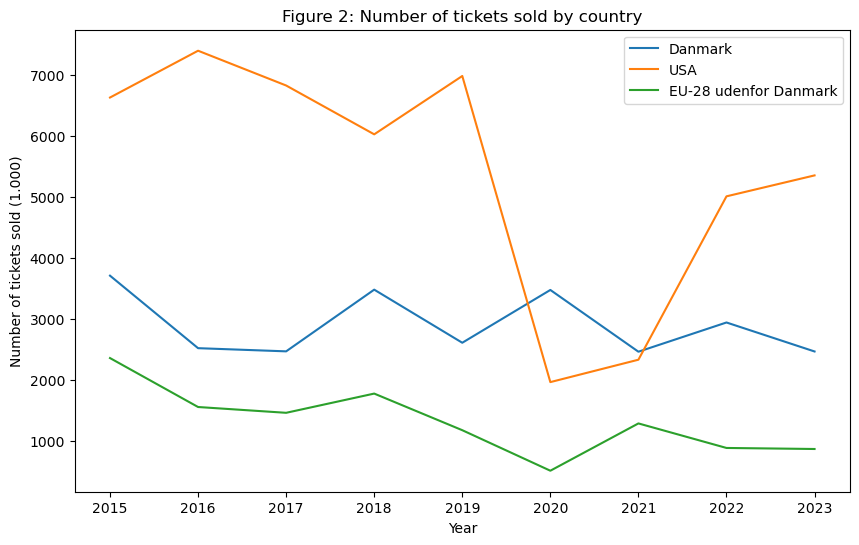

In [19]:
# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define filtered DataFrame for Denmark
filtered_bio_dk_tickets = filtered_bio[(filtered_bio['Country'] == 'Danmark') & (filtered_bio['Type'] == 'Solgte billetter (1.000)')]

# Define filtered DataFrame for USA
filtered_bio_usa_tickets = filtered_bio[(filtered_bio['Country'] == 'USA') & (filtered_bio['Type'] == 'Solgte billetter (1.000)')]

# Define filtered DataFrame for EU-28 excluding Denmark
filtered_bio_eu_tickets = filtered_bio[(filtered_bio['Country'] == 'EU-28 udenfor Danmark') & (filtered_bio['Country'] != 'Danmark') & (filtered_bio['Type'] == 'Solgte billetter (1.000)')]

# Plot for Danmark
ax.plot(filtered_bio_dk_tickets['Year'], filtered_bio_dk_tickets['Value'], label='Danmark')

# Plot for USA
ax.plot(filtered_bio_usa_tickets['Year'], filtered_bio_usa_tickets['Value'], label='USA')

# Plot for EU-28 udenfor Danmark
ax.plot(filtered_bio_eu_tickets['Year'], filtered_bio_eu_tickets['Value'], label='EU-28 udenfor Danmark')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of tickets sold (1.000)')
ax.set_title('Figure 2: Number of tickets sold by country')

# Add legend
ax.legend()

# Show the plot
plt.show()

Figure 2 shows the number of tickets sold for the US, Denmark and EU-28 excluding Denmark. The US seems to have sold a significant larger amount of tickets for cinema movies relative Denmark and the EU-28, in the beggining of the period. In this period the US have sold around 6000-7000 tickets a year, whereas Denmark has sold between 2500-4000 tickets a year and the EU-28 between 1000-2500 a year. In the period 2019-2020 Covid-19 happens, which indeed is visible in the data. In this period the amount of tickets sold in the US decreases with almost 5000 sold tickets which makes Danmark the most ticket-selling country. It actually seems like Denmark is relatively unaffected by the crises, whereas The EU-28 decreses a bit, but not at all in the same range as the US. From 2021 and forward the US ticket sale increases again. From this it seems like the cinemas has been affected the most in the US, relative to Denmark and the EU-28, due to Covid-19. 



To further see the difference in tickets sold, we dive into tickets sold in 2020 based on the movie type. 

**Figure 3a and 3b**

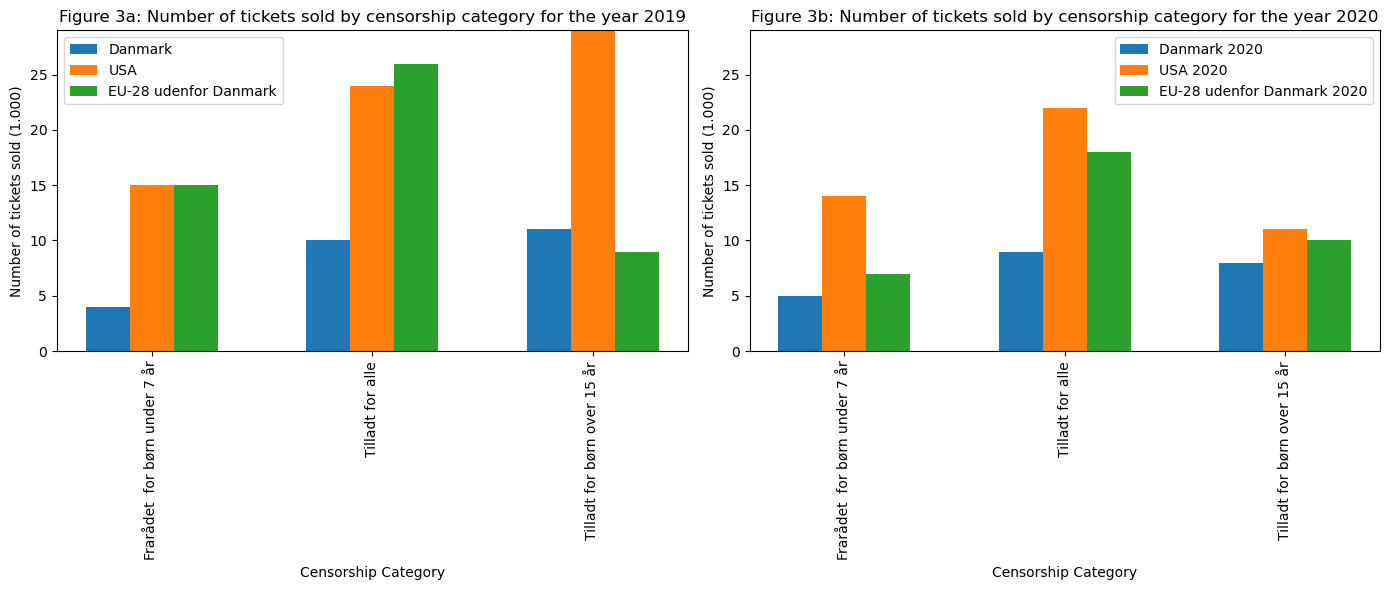

In [20]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 2019
# Define filtered DataFrame for Denmark for the year 2019
filtered_bio_dk_2019 = filtered_bio_cencorship[(filtered_bio_cencorship['Country'] == 'Danmark') & (filtered_bio_cencorship['Year'] == 2019)] 

# Define filtered DataFrame for USA for the year 2019
filtered_bio_usa_2019 = filtered_bio_cencorship[(filtered_bio_cencorship['Country'] == 'USA') & (filtered_bio_cencorship['Year'] == 2019)]

# Define filtered DataFrame for EU-28 excluding Denmark for the year 2019
filtered_bio_eu_2019 = filtered_bio_cencorship[(filtered_bio_cencorship['Country'] == 'EU-28 udenfor Danmark') & (filtered_bio_cencorship['Country'] != 'Danmark') & (filtered_bio_cencorship['Year'] == 2019)]

# Group the filtered DataFrames by the movie type 'Cinema_movie' and sum the values for 2019
grouped_bio_dk_2019 = filtered_bio_dk_2019.groupby('Censorship')['Value'].sum().reset_index()
grouped_bio_usa_2019 = filtered_bio_usa_2019.groupby('Censorship')['Value'].sum().reset_index()
grouped_bio_eu_2019 = filtered_bio_eu_2019.groupby('Censorship')['Value'].sum().reset_index()

# Define the width of each bar
bar_width = 0.2

# Define the positions for the bars for 2019
bar_positions_dk_2019 = np.arange(len(grouped_bio_dk_2019['Censorship']))
bar_positions_usa_2019 = np.arange(len(grouped_bio_usa_2019['Censorship'])) + bar_width
bar_positions_eu_2019 = np.arange(len(grouped_bio_eu_2019['Censorship'])) + 2 * bar_width

# Plot for Danmark for 2019
ax1.bar(bar_positions_dk_2019, grouped_bio_dk_2019['Value'], width=bar_width, label='Danmark')

# Plot for USA for 2019
ax1.bar(bar_positions_usa_2019, grouped_bio_usa_2019['Value'], width=bar_width, label='USA')

# Plot for EU-28 udenfor Danmark for 2019
ax1.bar(bar_positions_eu_2019, grouped_bio_eu_2019['Value'], width=bar_width, label='EU-28 udenfor Danmark')

# Set x-axis tick positions and labels for 2019
ax1.set_xticks(bar_positions_usa_2019)
ax1.set_xticklabels(grouped_bio_usa_2019['Censorship'])

# Set labels and title for 2019
ax1.set_xlabel('Censorship Category')
ax1.set_ylabel('Number of tickets sold (1.000)')
ax1.set_title('Figure 3a: Number of tickets sold by censorship category for the year 2019')

# Rotate x-axis labels for better readability for 2019
ax1.tick_params(axis='x', rotation=90)

# Add legend for 2019
ax1.legend()

# Plot for 2020
# Define filtered DataFrame for Denmark for the year 2020
filtered_bio_dk_2020 = filtered_bio_cencorship[(filtered_bio_cencorship['Country'] == 'Danmark') & (filtered_bio_cencorship['Year'] == 2020)] 

# Define filtered DataFrame for USA for the year 2020
filtered_bio_usa_2020 = filtered_bio_cencorship[(filtered_bio_cencorship['Country'] == 'USA') & (filtered_bio_cencorship['Year'] == 2020)]

# Define filtered DataFrame for EU-28 excluding Denmark for the year 2020
filtered_bio_eu_2020 = filtered_bio_cencorship[(filtered_bio_cencorship['Country'] == 'EU-28 udenfor Danmark') & (filtered_bio_cencorship['Country'] != 'Danmark') & (filtered_bio_cencorship['Year'] == 2020)]

# Group the filtered DataFrames by the movie type 'Cinema_movie' and sum the values for 2020
grouped_bio_dk_2020 = filtered_bio_dk_2020.groupby('Censorship')['Value'].sum().reset_index()
grouped_bio_usa_2020 = filtered_bio_usa_2020.groupby('Censorship')['Value'].sum().reset_index()
grouped_bio_eu_2020 = filtered_bio_eu_2020.groupby('Censorship')['Value'].sum().reset_index()

# Define the positions for the bars for 2020
bar_positions_dk_2020 = np.arange(len(grouped_bio_dk_2020['Censorship'])) + bar_width * 3
bar_positions_usa_2020 = np.arange(len(grouped_bio_usa_2020['Censorship'])) + bar_width * 3 + bar_width
bar_positions_eu_2020 = np.arange(len(grouped_bio_eu_2020['Censorship'])) + bar_width * 3 + 2 * bar_width

# Plot for Danmark for 2020
ax2.bar(bar_positions_dk_2020, grouped_bio_dk_2020['Value'], width=bar_width, label='Danmark 2020')

# Plot for USA for 2020
ax2.bar(bar_positions_usa_2020, grouped_bio_usa_2020['Value'], width=bar_width, label='USA 2020')

# Plot for EU-28 udenfor Danmark for 2020
ax2.bar(bar_positions_eu_2020, grouped_bio_eu_2020['Value'], width=bar_width, label='EU-28 udenfor Danmark 2020')

# Set x-axis tick positions and labels for 2020
ax2.set_xticks(bar_positions_usa_2020)
ax2.set_xticklabels(grouped_bio_usa_2020['Censorship'])

# Set labels and title for 2020
ax2.set_xlabel('Censorship Category')
ax2.set_ylabel('Number of tickets sold (1.000)')
ax2.set_title('Figure 3b: Number of tickets sold by censorship category for the year 2020')

# Rotate x-axis labels for better readability for 2020
ax2.tick_params(axis='x', rotation=90)

# Add legend for 2020
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Set the same y-axis limits for both subplots
max_value_2019 = max(grouped_bio_dk_2019['Value'].max(), grouped_bio_usa_2019['Value'].max(), grouped_bio_eu_2019['Value'].max())
max_value_2020 = max(grouped_bio_dk_2020['Value'].max(), grouped_bio_usa_2020['Value'].max(), grouped_bio_eu_2020['Value'].max())
max_value = max(max_value_2019, max_value_2020)
ax1.set_ylim(0, max_value)
ax2.set_ylim(0, max_value)

# Show the plot
plt.show()

Figure 3a and 3b above shows the number of tickets sold by cencorship for 2019 and 2020. Firstly we notice that the only category where the US isn't "leading" regarding tickets sold was in 2020 for "Tillads for børn over 15 år". Here Denmark has a higher number of tickets sold, which might be due to the fact that Covid-19 closing-down happened later in Denmark compared to the US - why people where still going to the cinema.

In 2019 we see, that the US has the most tickets sold for movies without censorship ("Tilladt for alle") and the same goes for EU-18. Whereas Denmark had the most tickets sold for "Tilladt for børn over 15 år". This distribution among censorhips was more or less the same in 2020, though EU-28 has a bit more tickets sold for the last censorship type "Tilladt for børn over 15 år", hereby following the danish distribution. 

**SHARE**
We wish to investigate the share of total movies and tickets (later divided on the censorship type).

In [21]:

#Calculate the share of the total number of movies for each country
total_movies_dk = filtered_bio_dk_movies['Value'].sum()
total_movies_usa = filtered_bio_usa_movies['Value'].sum()
total_movies_eu = filtered_bio_eu_movies['Value'].sum()

share_movies_dk = total_movies_dk / (total_movies_dk + total_movies_usa + total_movies_eu)
share_movies_usa = total_movies_usa / (total_movies_dk + total_movies_usa + total_movies_eu)
share_movies_eu = total_movies_eu / (total_movies_dk + total_movies_usa + total_movies_eu)


#Calculate the share of the total number of tickets sold for each country by censorships
total_tickets_dk = filtered_bio_dk_tickets['Value'].sum()
total_tickets_usa = filtered_bio_usa_tickets['Value'].sum()
total_tickets_eu = filtered_bio_eu_tickets['Value'].sum()

share_tickets_dk = total_tickets_dk / (total_tickets_dk + total_tickets_usa + total_tickets_eu)
share_tickets_usa = total_tickets_usa / (total_tickets_dk + total_tickets_usa + total_tickets_eu)
share_tickets_eu = total_tickets_eu / (total_tickets_dk + total_tickets_usa + total_tickets_eu)




print(f'The share of the total number of movies for Denmark is {share_movies_dk:.2f}')
print(f'The share of the total number of movies for USA is {share_movies_usa:.2f}')
print(f'The share of the total number of movies for EU-28 excluding Denmark is {share_movies_eu:.2f}')

print(f'The share of the total number of tickets sold for Denmark is {share_tickets_dk:.2f}')
print(f'The share of the total number of tickets sold for USA is {share_tickets_usa:.2f}')
print(f'The share of the total number of tickets sold for EU-28 excluding Denmark is {share_tickets_eu:.2f}')



The share of the total number of movies for Denmark is 0.17
The share of the total number of movies for USA is 0.46
The share of the total number of movies for EU-28 excluding Denmark is 0.37
The share of the total number of tickets sold for Denmark is 0.30
The share of the total number of tickets sold for USA is 0.56
The share of the total number of tickets sold for EU-28 excluding Denmark is 0.14


We see again, that among all tickets sold and all movies within all three "countries" the US has the highest share for both variables and approximately 50 pct. of the total share. Next comes Denmark and lastly EU-28, which is kind of odd, compared to EU-28 being the 27 countries in EU. (A thought is, that the EU28 is a average for the 27 countries, though this is not mentioned in the dataset at first glance).

Now we wish to investigate the share, but for each censorship category. We will do this by calculating the share of the total number of tickets sold for each country by censorship category. We zoom in on the same years as before, 2019 and 2020, and will plot to figures, one for each year.

C:\Users\annaf\AppData\Local\Temp\ipykernel_15160\1982884635.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_movies['Share'] = filtered_data_movies['Value'] / total_movies_country * 100
C:\Users\annaf\AppData\Local\Temp\ipykernel_15160\1982884635.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_movies['Share'] = filtered_data_movies['Value'] / total_movies_country * 100
C:\Users\annaf\AppData\Local\Temp\ipykernel_15160\1982884635.py:20: SettingWithCopyWarning: 
A value i

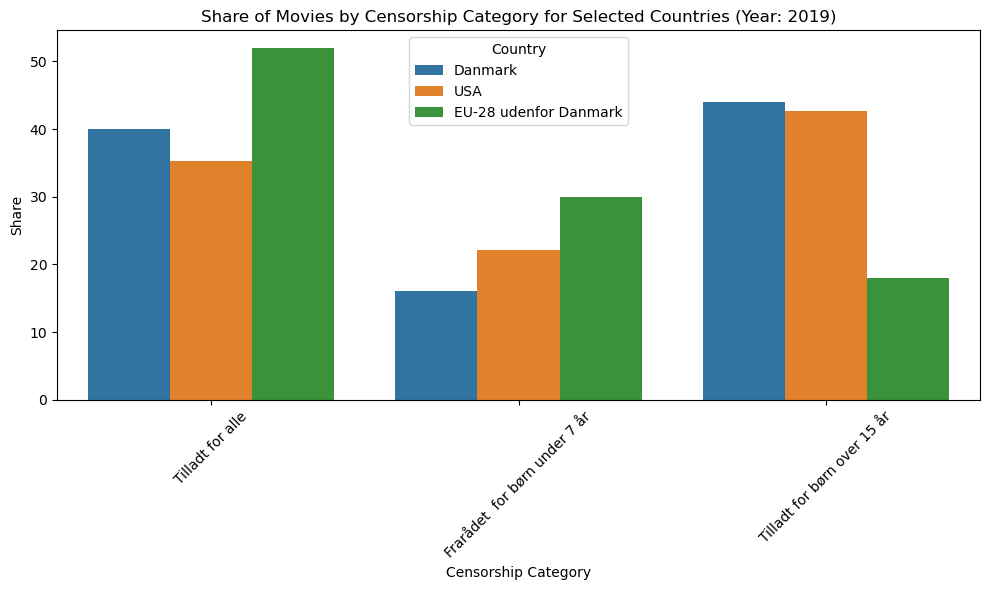

In [22]:
# Define the year
year = '2019' 
# Define a list of selected countries
selected_countries = ['Danmark', 'USA', 'EU-28 udenfor Danmark']

# List to store the filtered dataframes for each country and year
filtered_data_per_country = []

# Iterate over selected countries
for country in selected_countries:
    # Filter the data for the current country, type, and year
    filtered_data_movies = filtered_bio_cencorship[(filtered_bio_cencorship['Country'] == country) & 
                                                    (filtered_bio_cencorship['Type'] == 'Film (antal)') & 
                                                    (filtered_bio_cencorship['Year'] == int(year))]
    
    # Calculate the total number of movies for the current country and year
    total_movies_country = filtered_data_movies['Value'].sum()
    
    # Calculate the share of movies for each censorship category
    filtered_data_movies['Share'] = filtered_data_movies['Value'] / total_movies_country * 100
    
    # Append the filtered dataframe to the list
    filtered_data_per_country.append(filtered_data_movies)

# Concatenate the filtered dataframes for all countries
filtered_data_all_countries = pd.concat(filtered_data_per_country)

# Create the single plot
plt.figure(figsize=(10, 6))

# Create the plot
sns.barplot(data=filtered_data_all_countries, x='Censorship', y='Share', hue='Country')
plt.title(f'Share of Movies by Censorship Category for Selected Countries (Year: {year})')
plt.xlabel('Censorship Category')
plt.ylabel('Share')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Figure 4a above shows the share of movies by censorship based on countries and is shown for 2019 here, and 2020 below. Due to problems we had to make to seperate plots and coding pieces.
We will make the interpretation below figure 4b.

C:\Users\annaf\AppData\Local\Temp\ipykernel_15160\2607007096.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_movies['Share'] = filtered_data_movies['Value'] / total_movies_country * 100
C:\Users\annaf\AppData\Local\Temp\ipykernel_15160\2607007096.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_movies['Share'] = filtered_data_movies['Value'] / total_movies_country * 100
C:\Users\annaf\AppData\Local\Temp\ipykernel_15160\2607007096.py:19: SettingWithCopyWarning: 
A value i

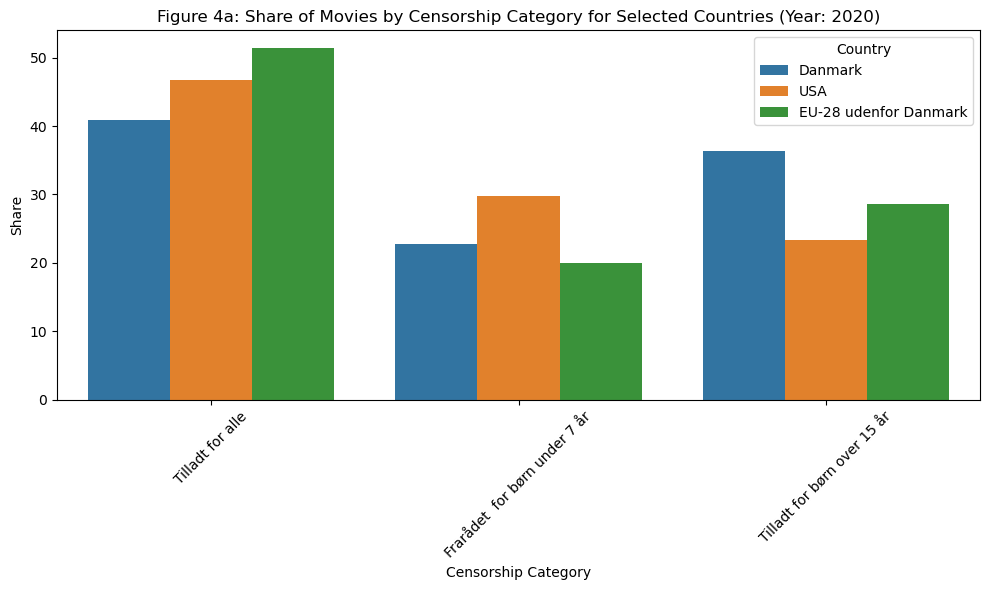

In [23]:
#We do the exact same thing for the year 2020

year = '2020'  # Change to '2020' for the other year

# List to store the filtered dataframes for each country and year
filtered_data_per_country = []

# Iterate over selected countries
for country in selected_countries:
    # Filter the data for the current country, type, and year
    filtered_data_movies = filtered_bio_cencorship[(filtered_bio_cencorship['Country'] == country) & 
                                                    (filtered_bio_cencorship['Type'] == 'Film (antal)') & 
                                                    (filtered_bio_cencorship['Year'] == int(year))]
    
    # Calculate the total number of movies for the current country and year
    total_movies_country = filtered_data_movies['Value'].sum()
    
    # Calculate the share of movies for each censorship category
    filtered_data_movies['Share'] = filtered_data_movies['Value'] / total_movies_country * 100
    
    # Append the filtered dataframe to the list
    filtered_data_per_country.append(filtered_data_movies)

# Concatenate the filtered dataframes for all countries
filtered_data_all_countries = pd.concat(filtered_data_per_country)

# Create the single plot
plt.figure(figsize=(10, 6))

# Create the plot
sns.barplot(data=filtered_data_all_countries, x='Censorship', y='Share', hue='Country')
plt.title('Figure 4a: 'f'Share of Movies by Censorship Category for Selected Countries (Year: {year})')
plt.xlabel('Censorship Category')
plt.ylabel('Share')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Figure 4b is the same as 4a, but for 2020 instead.
The distribution is more of less of the same trend in between the two years, where we see the highest share of movies is for the category "Tilladt for alle" for all three "countries".
The EU-28 countries has the highest share within this category, and the lowest share of movies in the category "Frarådet for børn under 7 år". 
There is a slight change in the share with regards to "tilladt for børn over 15 år", where EU-28 passes DK in 2020 with a higher share, but is also being passed in "Frarådet for børn under 7 år" by the US.

Funny enough we see that each of the countries has a "dominant" category, where they have the highest share between them.

Lastly we make an interactive plot in terms of number of movies by country

In [25]:
#Make an interactive plot for the number of movies sold by country
def plot_number_of_movies(country):
    # Create a single plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define filtered DataFrame for the selected country
    filtered_bio_country_movies = filtered_bio[(filtered_bio['Country'] == country) & (filtered_bio['Type'] == 'Film (antal)')]

    # Plot for the selected country
    ax.plot(filtered_bio_country_movies['Year'], filtered_bio_country_movies['Value'], label=country)

    # Set labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of movies')
    ax.set_title(f'Number of movies by country: {country}')

    # Add legend
    ax.legend()

    # Show the plot
    plt.show()

# Create a dropdown widget for the selected country
country_widget = widgets.Dropdown(
    options=selected_countries,
    description='Country:',
    disabled=False
)

# Create an interactive plot
widgets.interactive(plot_number_of_movies, country=country_widget)



interactive(children=(Dropdown(description='Country:', options=('Danmark', 'USA', 'EU-28 udenfor Danmark'), va…

The graph above simply shows the number of movies by country, but is interactive with a dropdown menu in terms of selecting the country. The graph itself doesn't provide any new information, but is very cool :)

# Conclusion

In this data analysis project we looked in to the development of movies and sold tickets to the movies, where we focused on DK, US and EU. We used data stemming from DST and the time period of the dataset is from 2015 until 2023. We further analyzed the censorship types with regards to both absolute and the share of total movies. 
In general we find that the US has the highest number both for movies and for sold tickets, though to this we see that the effect of Covid-19 lock down had a huge effect on the movie-market in the US as shown in the analysis above. We see that in general there is being produced a larger share of movies which is allowed for everyone, which might be due to the fact that a larger share of people will be able to watch the movie, compared to limiting the movie to a certain age.